In [1]:
%load_ext autoreload
%autoreload 3



In [2]:
import torch
torch.cuda.set_device("cuda:2")

In [3]:
from engine import *
from diffusion import *

from matplotlib import pyplot as plt

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


In [4]:
import controlled_multi

In [5]:
skretch = gen_metropolis(50)

skretch = add_skies(skretch, 4, Z = 200)


##skretch = gen_house()


(512, 512, 3)


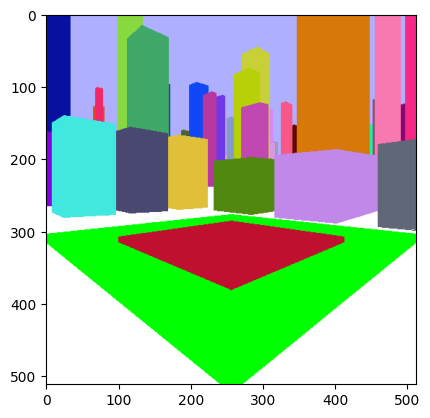

In [6]:
verbose = 0
linewidth = 0
pov = Point(0,0,12)
direction = Point(1,1,-0.1)
vision_angle = 35

sc1 = Scene(skretch, pov, direction, resolution = (512,512), vision_angle = 35, verbose = verbose, linewidth = linewidth)

seg_map = sc1.get_seg_map()
print(seg_map.shape)

plt.imshow(seg_map)

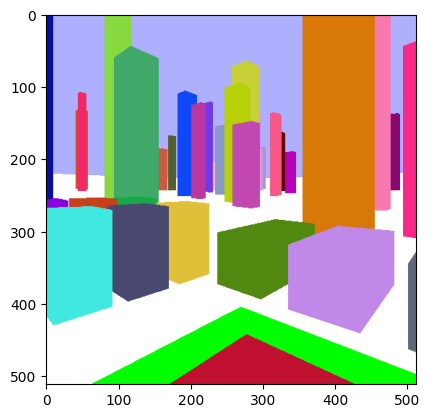

In [7]:
pov = Point(0,10,40)
direction = Point(1,0.9,-0.1)
sc2 = Scene(skretch, pov, direction, resolution = (512,512), vision_angle = 35, verbose = verbose, linewidth = linewidth)
##seg_map = sc2.get_seg_map()
# print(seg_map.shape)
plt.imshow(sc2.get_seg_map())

src,dst = sc1.connect(sc2, verbose = False, interpolate_k = 0)

target = np.zeros_like(seg_map)

target[dst[0],dst[1]] = seg_map[src[0],src[1]]
plt.imshow(seg_map)
plt.show()
plt.imshow(target)
plt.show()
seg_map2 = sc2.get_seg_map()
plt.imshow(seg_map2)


In [12]:

##prompt = "a farm"

device = "cuda"
model = "realistic"
control = ['seg','normal']
##control = ['seg']

pipe = controlled_multi.MultiDiffusion(device, control, sc1, sc2, model=model , hf_key=None)

[INFO] loading stable diffusion...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

[INFO] pairing scenes
[INFO] loaded stable diffusion!


In [17]:
prompt = "a cyberpunk city. Neon lighting, Dark skies. Epic realistic, (hdr:1.4), (muted colors:1.4), apocalypse, abandoned, screen space refractions, (intricate details), (intricate details, hyperdetailed:1.4), artstation, vignette"
nprompt = "blurry, foggy"
image1, image2 = pipe(prompt = prompt, negative_prompt = nprompt, 
                      num_inference_steps = 800, pairing_strength = 0.8, max_pairing_steps = 800, display_every= -1, guidance_scale = 9.0,
                      controlnet_conditioning_scale = [1.0, 0.4])

  0%|          | 0/800 [00:00<?, ?it/s]

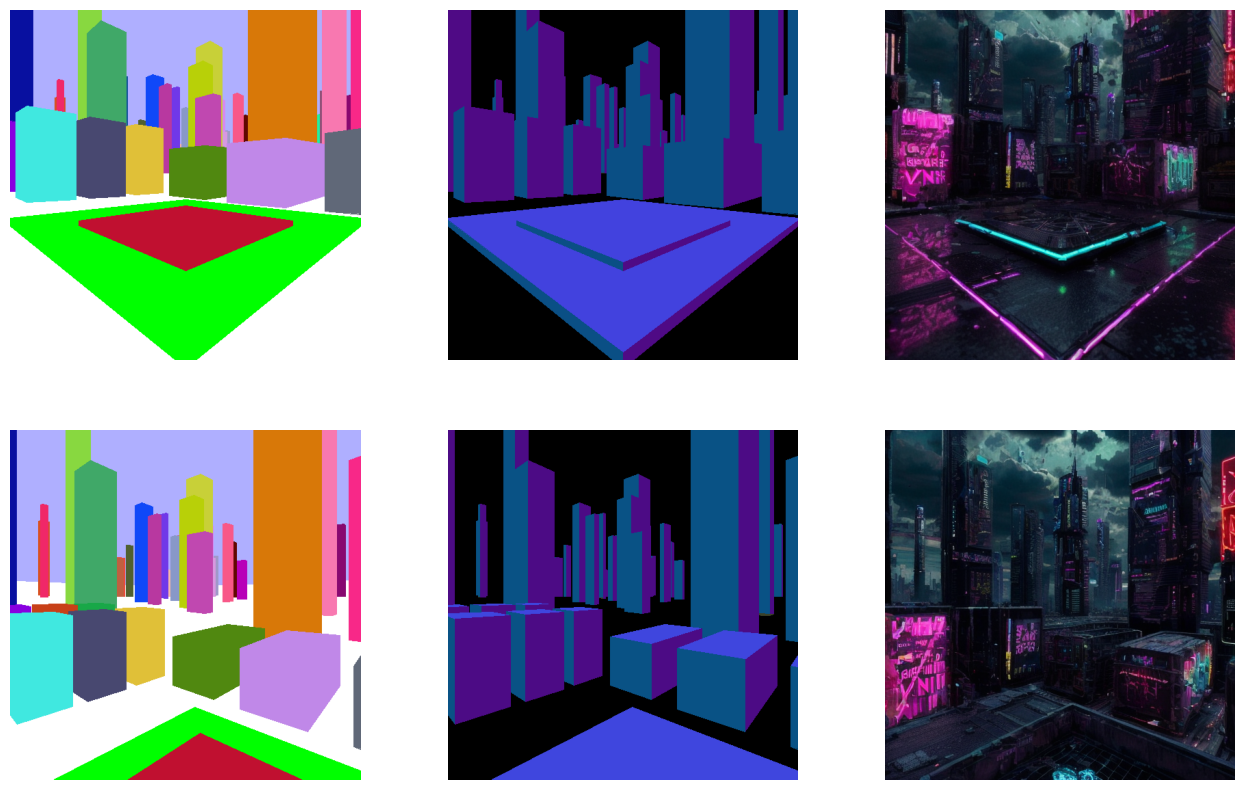

In [18]:
src = [[sc.get_seg_map(),sc.get_norm_map()] for sc in [sc1,sc2]] if 'normal' in control else [[sc.get_seg_map()] for sc in [sc1,sc2]] 



results = [np.asarray(image1), np.asarray(image2)]

present(src, results)

In [35]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [ ]:
plt.imshow(image[0])

In [78]:
map1 = (np.random.randn(2,16)*2).to(dtype=torch.int)
map2 = (torch.randn(2,16)*2).to(dtype=torch.int)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 map1 = (np.random.randn(2,16)*2).to(dtype=torch.int)                                         │
│   2 map2 = (torch.randn(2,16)*2).to(dtype=torch.int)                                             │
│   3                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'numpy.ndarray' object has no attribute 'to'

In [37]:
map1

tensor([[ 1,  2, -4, -1,  0, -1,  2, -3,  2,  2,  0,  1,  0, -2,  0,  1],
        [-1,  3,  0, -1, -1,  0, -1,  0,  0, -2,  0,  0,  0,  1,  0,  0]],
       dtype=torch.int32)

In [38]:
map2

tensor([[ 0,  0,  0,  0,  0, -2,  0, -1,  2, -1,  0,  2, -2,  0,  2,  0],
        [-1,  1, -1,  0, -2,  0, -1,  0,  3, -1, -2,  1,  3,  1,  2,  1]],
       dtype=torch.int32)

In [91]:
new_map1 = []
new_map2 = []
for i in range(map1.size(1)):
    val1 = tuple(map1[:,i])
    val2 = tuple(map2[:,i])
    if not val1 in new_map1 and not val2 in new_map2:
        new_map1.append(val1)
        new_map2.append(val2)
        
map1 = np.asarray(new_map1).transpose()
map2 = np.asarray(new_map2).transpose()

In [92]:
map1

array([[ 1,  2, -1,  0, -1, -3,  2,  2,  1,  0],
       [-1,  3, -1, -1,  0,  0,  0, -2,  0,  0]], dtype=int32)

In [93]:
map2

array([[ 0,  0,  0,  0, -2, -1,  2, -1,  2, -2],
       [-1,  1,  0, -2,  0,  0,  3, -1,  1,  3]], dtype=int32)

In [54]:
map1_un = np.unique(map1, axis = 1)

In [61]:
for u in map1_un.transpose():
    print(u)

[-4  0]
[-3  0]
[-2  1]
[-1 -1]
[-1  0]
[ 0 -1]
[0 0]
[ 1 -1]
[1 0]
[ 2 -2]
[ 2 -1]
[2 0]
[2 3]


In [41]:
inv

array([ 7, 12,  0,  3,  5,  4, 10,  1, 11,  9,  6,  8,  6,  2,  6,  8])

In [31]:
np.arange(map1.shape[1])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
prompt = "a countryside farm. Bright skies. Epic realistic, (hdr:1.4), (muted colors:1.4), abandoned, (intricate details), (intricate details, hyperdetailed:1.4), artstation, vignette"
device = "cuda"
model = "realistic"
control = ["seg"]
steps = 200

stamped_img, src = run_diffusion(sc1 , device = device, prompt = prompt, model = model, control = control, steps = steps)

In [ ]:
model_id_or_path = get_model_path(model)


In [ ]:
controlnets, mconds = get_controls(control, sc1)

In [ ]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(model_id_or_path, controlnet=controlnets, safety_checker=None, torch_dtype=torch.float16)

In [ ]:
sc1.transition(sc2, intensity = 1.0)

src = [[sc.get_seg_map()] for sc in [sc1,sc2]] 
results = [sc.get_image() for sc in [sc1,sc2]]

present(src, results)

In [ ]:
def run_inpainting(scene , device = "cuda", prompt = None, model = "realistic", control = "seg", steps = 200, strength = 1.0):
    if prompt is None:
        prompt = "a countryside farm. Epic realistic, (hdr:1.4), (muted colors:1.4), abandoned, (intricate details), (intricate details, hyperdetailed:1.4), artstation, vignette"

    model_id_or_path = get_model_path(model)

    controlnets, mconds = get_controls(control, scene)

    # pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    #     model_id_or_path, controlnet=controlnets, safety_checker=None, torch_dtype=torch.float16
    # )
    
    pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
        model_id_or_path, controlnet=controlnets, safety_checker=None, torch_dtype=torch.float16
    )

    pipe = pipe.to(device)

    pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

    pipe.enable_xformers_memory_efficient_attention()

    pipe.enable_model_cpu_offload()

    start_image = scene.get_image()

    mask = (np.where(start_image == (0,0,0), 1, 0).sum(2)==3)
    
    ##mask = np.float32(mask)
    
    # kernel = np.ones((3,3),np.float)
    # mask = cv2.dilate(mask,kernel,iterations = 1)
    # import pdb; pdb.set_trace()
    
    mask = mask.astype(np.uint8)

    plt.imshow(mask)
    plt.show()

    
    image = pipe(prompt, image=start_image, mask_image=mask, control_image= mconds, 
                         strength = strength, num_inference_steps=steps,
                         height=1024, width=1024).images[0]

    stamp_image = np.asarray(image)

    ##scene.set_image(stamp_image)


    return stamp_image, mconds

In [ ]:
stamped_img, src = run_inpainting(sc2 , device = device, prompt = prompt, model = model, control = control, steps = 100, strength = 1.0)

src = [[sc.get_seg_map()] for sc in [sc1,sc2]] 
results = [sc.get_image() for sc in [sc1,sc2]]

present(src, results)

In [ ]:
# def run_refine(scene , device = "cuda", prompt = None, steps = 200, strength = 1.0):
#     if prompt is None:
#         prompt = "a countryside farm. Epic realistic, (hdr:1.4), (muted colors:1.4), abandoned, (intricate details), (intricate details, hyperdetailed:1.4), artstation, vignette"

#     pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
#         "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
#     )

#     pipe = pipe.to(device)

#     pipe.enable_xformers_memory_efficient_attention()

#     pipe.enable_model_cpu_offload()

#     start_image = scene.get_image()

#     ##import pdb; pdb.set_trace()

#     image = pipe(prompt, image=start_image, strength = strength, 
#                          num_inference_steps=steps, ).images[0]

#     output_image = np.asarray(image)

#     scene.set_image(output_image)

#     return stamp_image

def run_img2img(scene , device = "cuda", prompt = None, model = "realistic", control = "seg", steps = 200, strength = 1.0):
    if prompt is None:
        prompt = "a countryside farm. Epic realistic, (hdr:1.4), (muted colors:1.4), abandoned, (intricate details), (intricate details, hyperdetailed:1.4), artstation, vignette"

    model_id_or_path = get_model_path(model)

    controlnets, mconds = get_controls(control, scene)

    pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
        model_id_or_path, controlnet=controlnets, safety_checker=None, torch_dtype=torch.float16
    )
    
    # pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
    #     model_id_or_path, controlnet=controlnets, safety_checker=None, torch_dtype=torch.float16
    # )

    pipe = pipe.to(device)

    pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

    pipe.enable_xformers_memory_efficient_attention()

    pipe.enable_model_cpu_offload()

    start_image = scene.get_image()

    image = pipe(prompt, image=start_image, control_image= mconds, 
                         strength = strength, num_inference_steps=steps,
                         height=1024, width=1024).images[0]
    
    stamp_image = np.asarray(image)

    print("before:")
    plt.imshow(start_image)
    plt.show()
    print("stamp image shape: ", stamp_image.shape)
    plt.imshow(stamp_image)
    plt.show()

    ##scene.set_image(stamp_image)

    return stamp_image, mconds




run_img2img(sc2 , device = device, prompt = prompt, steps = 800, strength = 0.5, model = "realistic", control = ["seg"])

src = [[sc.get_seg_map()] for sc in [sc1,sc2]] 
results = [sc.get_image() for sc in [sc1,sc2]]

present(src, results)